
<div class="markdown-google-sans">
  <h2>Ersilia eos60li</h1>
</div>

Here we will evalute the model :)

In [82]:
# In this codeblock I will import the necessary packages and specify the paths to relevant folders
%%capture
%env MINICONDA_INSTALLER_SCRIPT=Miniconda3-py37_4.12.0-Linux-x86_64.sh
%env MINICONDA_PREFIX=/usr/local
%env PYTHONPATH= "$PYTHONPATH:/usr/local/lib/python3.7/site-packages"
%env PIP_ROOT_USER_ACTION=ignore

!wget https://repo.anaconda.com/miniconda/$MINICONDA_INSTALLER_SCRIPT
!chmod +x $MINICONDA_INSTALLER_SCRIPT
!./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX

!python -m pip install git+https://github.com/ersilia-os/ersilia.git
!python -m pip install requests --upgrade
import sys

_ = sys.path.append("/usr/local/lib/python3.7/site-packages")

In [83]:
## Mount google drive
from google.colab import drive
drive.mount("/content/drive")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<div class="markdown-google-sans">

### **Data processing**
</div>

<div>

In this notebook, I am loading a list of molecules from reference library.

</div>

In [96]:
# specify input folder, output folder, smiles column

input_folder = "/content/drive/MyDrive/Ersilia"
output_folder = "/content/output"
smiles_column = "smiles"

In [104]:

#finding number of smiles

import pandas as pd

#path = "%s/%s.csv" % (input_folder, input_filename)
smi_col = "%s" % smiles_column
df = pd.read_csv("/content/reference_library.csv")
smiles = df[smi_col].tolist()

print("My dataset contains" + " " + str(len(smiles)) + " " + "SMILES :)")

My dataset contains 1000 SMILES :)


<div class="markdown-google-sans">

#### I have used eos6oli from Ersilia Model Hub to run predictions for given data. link to [here](https://ersilia.io/model-hub)
</div>

1. Enter the model name
2. Fetch models
3. Make predictions or calculations
4. Save the result to a .csv file in your google drive.

In [101]:
# Enter the model name
model_name = "eos6oli"

In [102]:
# @title 📥 Fetch the model
import time

begin = time.time()
!ersilia fetch $model_name
end = time.time()

print("Time taken:", round((end - begin), 2), "seconds")

⬇️  Fetching model eos6oli: soltrannet-aqueous-solubility
sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
[]
sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
🚀 Serving model eos6oli: soltrannet-aqueous-solubility

   URL: http://127.0.0.1:47965
   PID: 54019
   SRV: conda

👉 To run model:
   - run

💁 Information:
   - info
sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
⛔ Model eos6oli closed
👍 Model eos6oli fetched successfully!
Time taken: 183.56 seconds


In [103]:
# @title ⚙️ Serve the model

# returns available APIs (calculate or predict)

!ersilia serve $model_name

sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
🚀 Serving model eos6oli: soltrannet-aqueous-solubility

   URL: http://127.0.0.1:36273
   PID: 54246
   SRV: conda

👉 To run model:
   - run

💁 Information:
   - info


#Model Bias Evaluation
Now, I will use the predictions I got from the Ersilia Model Hub on the dataset of 1000 molecules curated above and see how are they distributed in their space (which might be 0 to 1 for probabilities, or different for regression models)

In [90]:
# @title ⚡ Run predictions
api = "calculate"  # @param {type:"string"}

from ersilia import ErsiliaModel
import time

model = ErsiliaModel(model_name)
begin = time.time()
output = model.api(input=smiles, output="pandas")
end = time.time()

print("Successful 👍! Time taken:", round((end - begin), 2), "seconds")
model.close()

Successful 👍! Time taken: 57.08 seconds


In [91]:
# @title ✔️ Check your results

print(output.head())

                           key  \
0  SUTWUYBMBWPLMW-MDWZMJQESA-N   
1  RIYHJWOTNJXDLV-UHFFFAOYSA-N   
2  OGNBARHGQVMGGX-UHFFFAOYSA-N   
3  WQEXDIRUOYNDCM-UHFFFAOYSA-N   
4  YEGVLLQDOGYWDQ-OAHLLOKOSA-N   

                                               input  solubility  
0                       CCCCNC(=S)N/N=C/C1=C(C)C=CS1      -3.454  
1         CN1C(SCC2=NC(C3=CC=CS3)=NO2)=NN=C1C1CCCCC1      -4.502  
2           O=C(O)CC(NC(=O)C1=CN=CC=N1)C1=CC=CC=C1Cl      -2.900  
3  O=S(=O)(C1=CC=CC=C1)N1CCN(C2=NOC3=CC=CC(Cl)=C2...      -4.777  
4  CCC[C@@H](C)N(C1=CC(Cl)=CC=C1CO)S(=O)(=O)C1=CC...      -4.473  


In [92]:
# @title 💾 Save your results in Google Drive

output_path = "%s/%s_output.csv" % (output_folder, model_name)
output.to_csv(output_path, index=False)

AS per intructions I ploted scatered plot! but seems like it is not visualizing what we really want to. SO, I prefered to visualize data in histogram. Now, we can easily see freqencies of each compond and their solubility

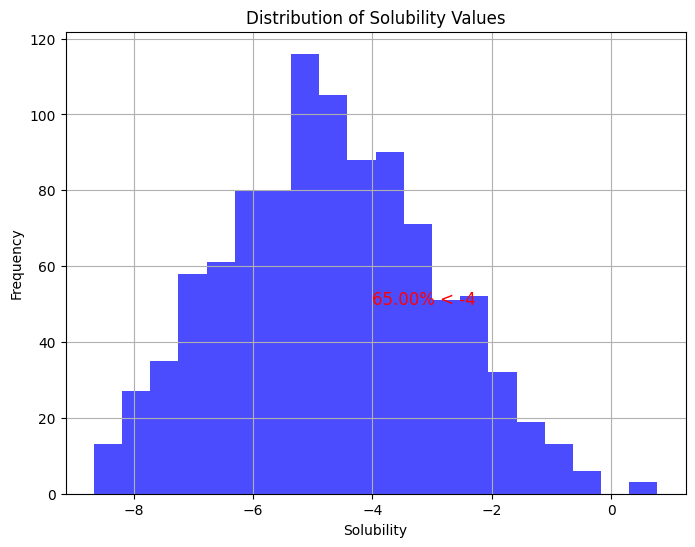

In [106]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the output data from the saved CSV file
output_path = "/content/output/eos6oli_output.csv"  # Update this with the correct path
output = pd.read_csv(output_path)

# Extract the solubility values from the DataFrame
solubility_values = output['solubility']
# Extract the solubility values from the DataFrame
solubility_values = output['solubility']

# Calculate the percentage of solubility values less than -4
percentage_less_than_minus_4 = (solubility_values < -4).mean() * 100

# Create a histogram
plt.figure(figsize=(8, 6))
plt.hist(solubility_values, bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Solubility Values')
plt.xlabel('Solubility')
plt.ylabel('Frequency')
plt.grid(True)

# Add text annotation for the percentage less than -4
plt.text(-4, 50, f'{percentage_less_than_minus_4:.2f}% < -4', fontsize=12, color='red')

plt.show()


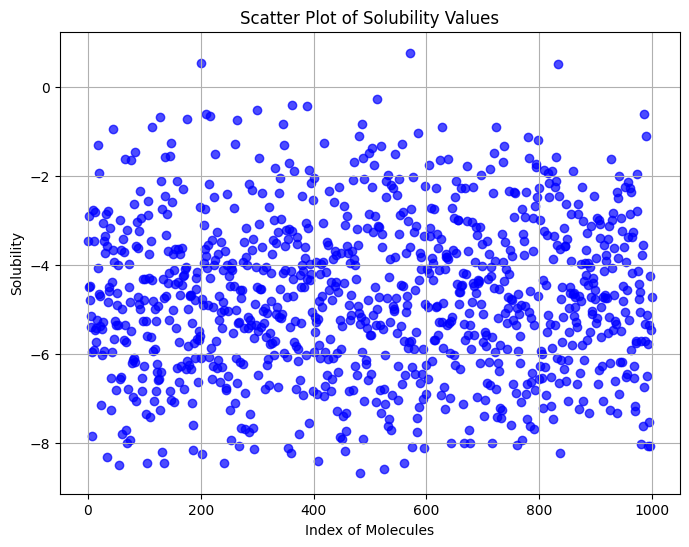

In [95]:
# Extract the solubility values from the DataFrame
solubility_values = output['solubility']

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(output.index, solubility_values, color='blue', alpha=0.7)
plt.title('Scatter Plot of Solubility Values')
plt.xlabel('Index of Molecules')
plt.ylabel('Solubility')
plt.grid(True)
plt.show()

model bias evaluation